# Сессия 2

### Описание задачи

В этой сессии вы продолжаете работать с данными, подготовленными в предыдущей сессии.
Предобработанные данные предстоит классифицировать и визуализировать зависимости данных.
Какая-либо работа, обусловленная задачами предыдущей сессии, выполненная в ходе текущей,
оцениваться не будет, поэтому проделывайте её только в случае необходимости.

Подключение библиотек

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import (
    accuracy_score, 
    confusion_matrix, 
    precision_score
)

In [29]:
# считывание набора данных
data = pd.read_csv(r"C:\Users\МОиБД\Downloads\data.csv")

In [30]:
data

total_cases  new_cases  total_deaths  new_deaths  \
0           75258.0        0.0        1364.0         0.0   
1           75258.0        0.0        1364.0         0.0   
2           75258.0        0.0        1364.0         0.0   
3           75258.0        0.0        1364.0         0.0   
4           75258.0        0.0        1364.0         0.0   
...             ...        ...           ...         ...   
373413     266202.0        0.0        5737.0         0.0   
373414     266202.0        0.0        5737.0         0.0   
373415     266202.0        0.0        5737.0         0.0   
373416     266202.0        0.0        5737.0         0.0   
373417     266257.0       55.0        5737.0         0.0   

        total_cases_per_million  new_cases_per_million  \
0                     31531.022                   0.00   
1                     31531.022                   0.00   
2                     31531.022                   0.00   
3                     31531.022                   0.00   
4                     31531.022                   0.00   
...                         ...                    ...   
373413                16310.858                   0.00   
373414                16310.858                   0.00   
373415                16310.858                   0.00   
373416                16310.858                   0.00   
373417                16314.228                   3.37   

        new_cases_smoothed_per_million  total_deaths_per_million  \
0                                5.157                   394.004   
1                                5.157                   394.004   
2                                5.157                   394.004   
3                                5.157                   394.004   
4                                5.157                   394.004   
...                                ...                       ...   
373413                           0.744                   351.520   
373414                           0.744                   351.520   
373415                           0.744                   351.520   
373416                           0.744                   351.520   
373417                           0.481                   351.520   

        new_deaths_per_million  new_deaths_smoothed_per_million  \
0                          0.0                            0.004   
1                          0.0                            0.004   
2                          0.0                            0.004   
3                          0.0                            0.004   
4                          0.0                            0.004   
...                        ...                              ...   
373413                     0.0                            0.026   
373414                     0.0                            0.026   
373415                     0.0                            0.026   
373416                     0.0                            0.026   
373417                     0.0                            0.000   

        population_density  aged_65_older  gdp_per_capita  \
0                   54.422          2.581        1803.987   
1                   54.422          2.581        1803.987   
2                   54.422          2.581        1803.987   
3                   54.422          2.581        1803.987   
4                   54.422          2.581        1803.987   
...                    ...            ...             ...   
373413              42.729          2.822        1899.775   
373414              42.729          2.822        1899.775   
373415              42.729          2.822        1899.775   
373416              42.729          2.822        1899.775   
373417              42.729          2.822        1899.775   

        cardiovasc_death_rate  diabetes_prevalence  life_expectancy  \
0                     597.029                 9.59            64.83   
1                     597.029                 9.59            64.83   
2                     

## 2.1 Разбиение набора данных

Разделите исходный набор данных на обучающую и тестирующую выборки оптимальным 
образом. Приведите обоснование разбиения

In [31]:
# подготовка двух датасетов: один включает в себя
# всё из начального датасета, кроме целевой переменной 'cluster'
# второй - включает в себя только целевую переменную 'cluster' 
features = data.drop(['cluster'], axis=1)
target = data['cluster']

так как для обучения модели требуется больше данных чем для тестирования, тестовая выборка будет содержать 0,25 данных.

In [32]:
# разбиение наборов данных на обучающуюся и тестирующуюся выборки отношением 75/25
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=12345)

In [33]:
# размерности четырех выборок
print(features_train.shape, features_test.shape, target_train.shape, target_test.shape)

(280063, 19) (93355, 19) (280063,) (93355,)


## 2.2 Визуализация зависимостей данных

Используя программные средства, визуализируйте зависимости атрибутов в наборе данных. 
Визуализация должна отражать влияние атрибутов на определение классов – уровня опасности 
посещения страны для туриста. Произведите расчеты зависимостей по выбранным алгоритмам.
Приведите интерпретацию полученным результатам

<Axes: xlabel='cluster', ylabel='count'>

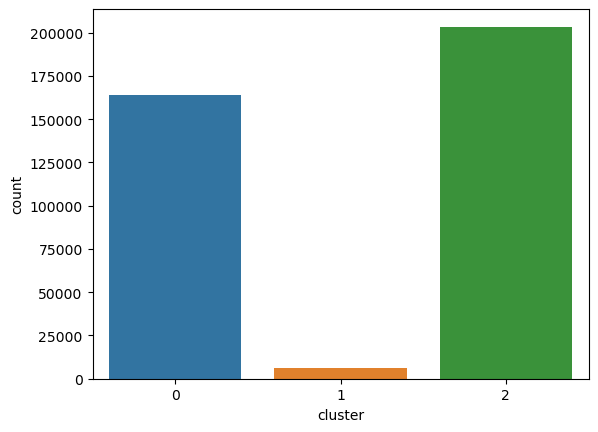

In [7]:
# соотношение количества записей в зависимости от кластера
sns.countplot(x = 'cluster', data = data)

классы кластеров распределены неравномерно

In [34]:
from sklearn.feature_selection import f_classif
from sklearn.ensemble import ExtraTreesClassifier

**f_classif** - это метод, используемый для оценки важности признаков на основе анализа дисперсии между классами в задачах классификации. Он вычисляет F-статистику для каждого признака и его целевой переменной и затем преобразует ее в оценку значимости признака. Большие значения F-статистики и малые p-значения указывают на более значимый признак.

**ExtraTreesClassifier** - это алгоритм, который использует метод "Extremely Randomized Trees" (Extra Trees) для классификации данных. Он является вариацией алгоритма случайного леса, но с двумя ключевыми различиями: первое, разделение узлов в деревьях происходит на случайных подмножествах признаков, и второе, вместо поиска наилучшего разделения, случайные разделения используются на каждом узле.

In [35]:
clf = ExtraTreesClassifier(n_estimators=50)
# features - матрица признаков, target - вектор целевой переменной
clf = clf.fit(features, target)
clf.feature_importances_

array([0.02614669, 0.00226717, 0.0308685 , 0.00261201, 0.11762631,
       0.00239595, 0.01075073, 0.12199448, 0.00251359, 0.01355823,
       0.01777452, 0.13355494, 0.13330307, 0.0535137 , 0.02040678,
       0.14279778, 0.13358951, 0.03292847, 0.00139757])

In [10]:
df_features_importances = pd.DataFrame({"feature": data.drop(["cluster"], axis=1).columns, "importance": clf.feature_importances_})
df_features_importances

feature  importance
0                       total_cases    0.026483
1                         new_cases    0.002078
2                      total_deaths    0.032529
3                        new_deaths    0.002535
4           total_cases_per_million    0.131567
5             new_cases_per_million    0.002602
6    new_cases_smoothed_per_million    0.010604
7          total_deaths_per_million    0.095970
8            new_deaths_per_million    0.002656
9   new_deaths_smoothed_per_million    0.014111
10               population_density    0.016473
11                    aged_65_older    0.123806
12                   gdp_per_capita    0.119834
13            cardiovasc_death_rate    0.056918
14              diabetes_prevalence    0.024436
15                  life_expectancy    0.137450
16          human_development_index    0.170759
17                       population    0.027754
18                               RT    0.001434

<Axes: xlabel='feature', ylabel='importance'>

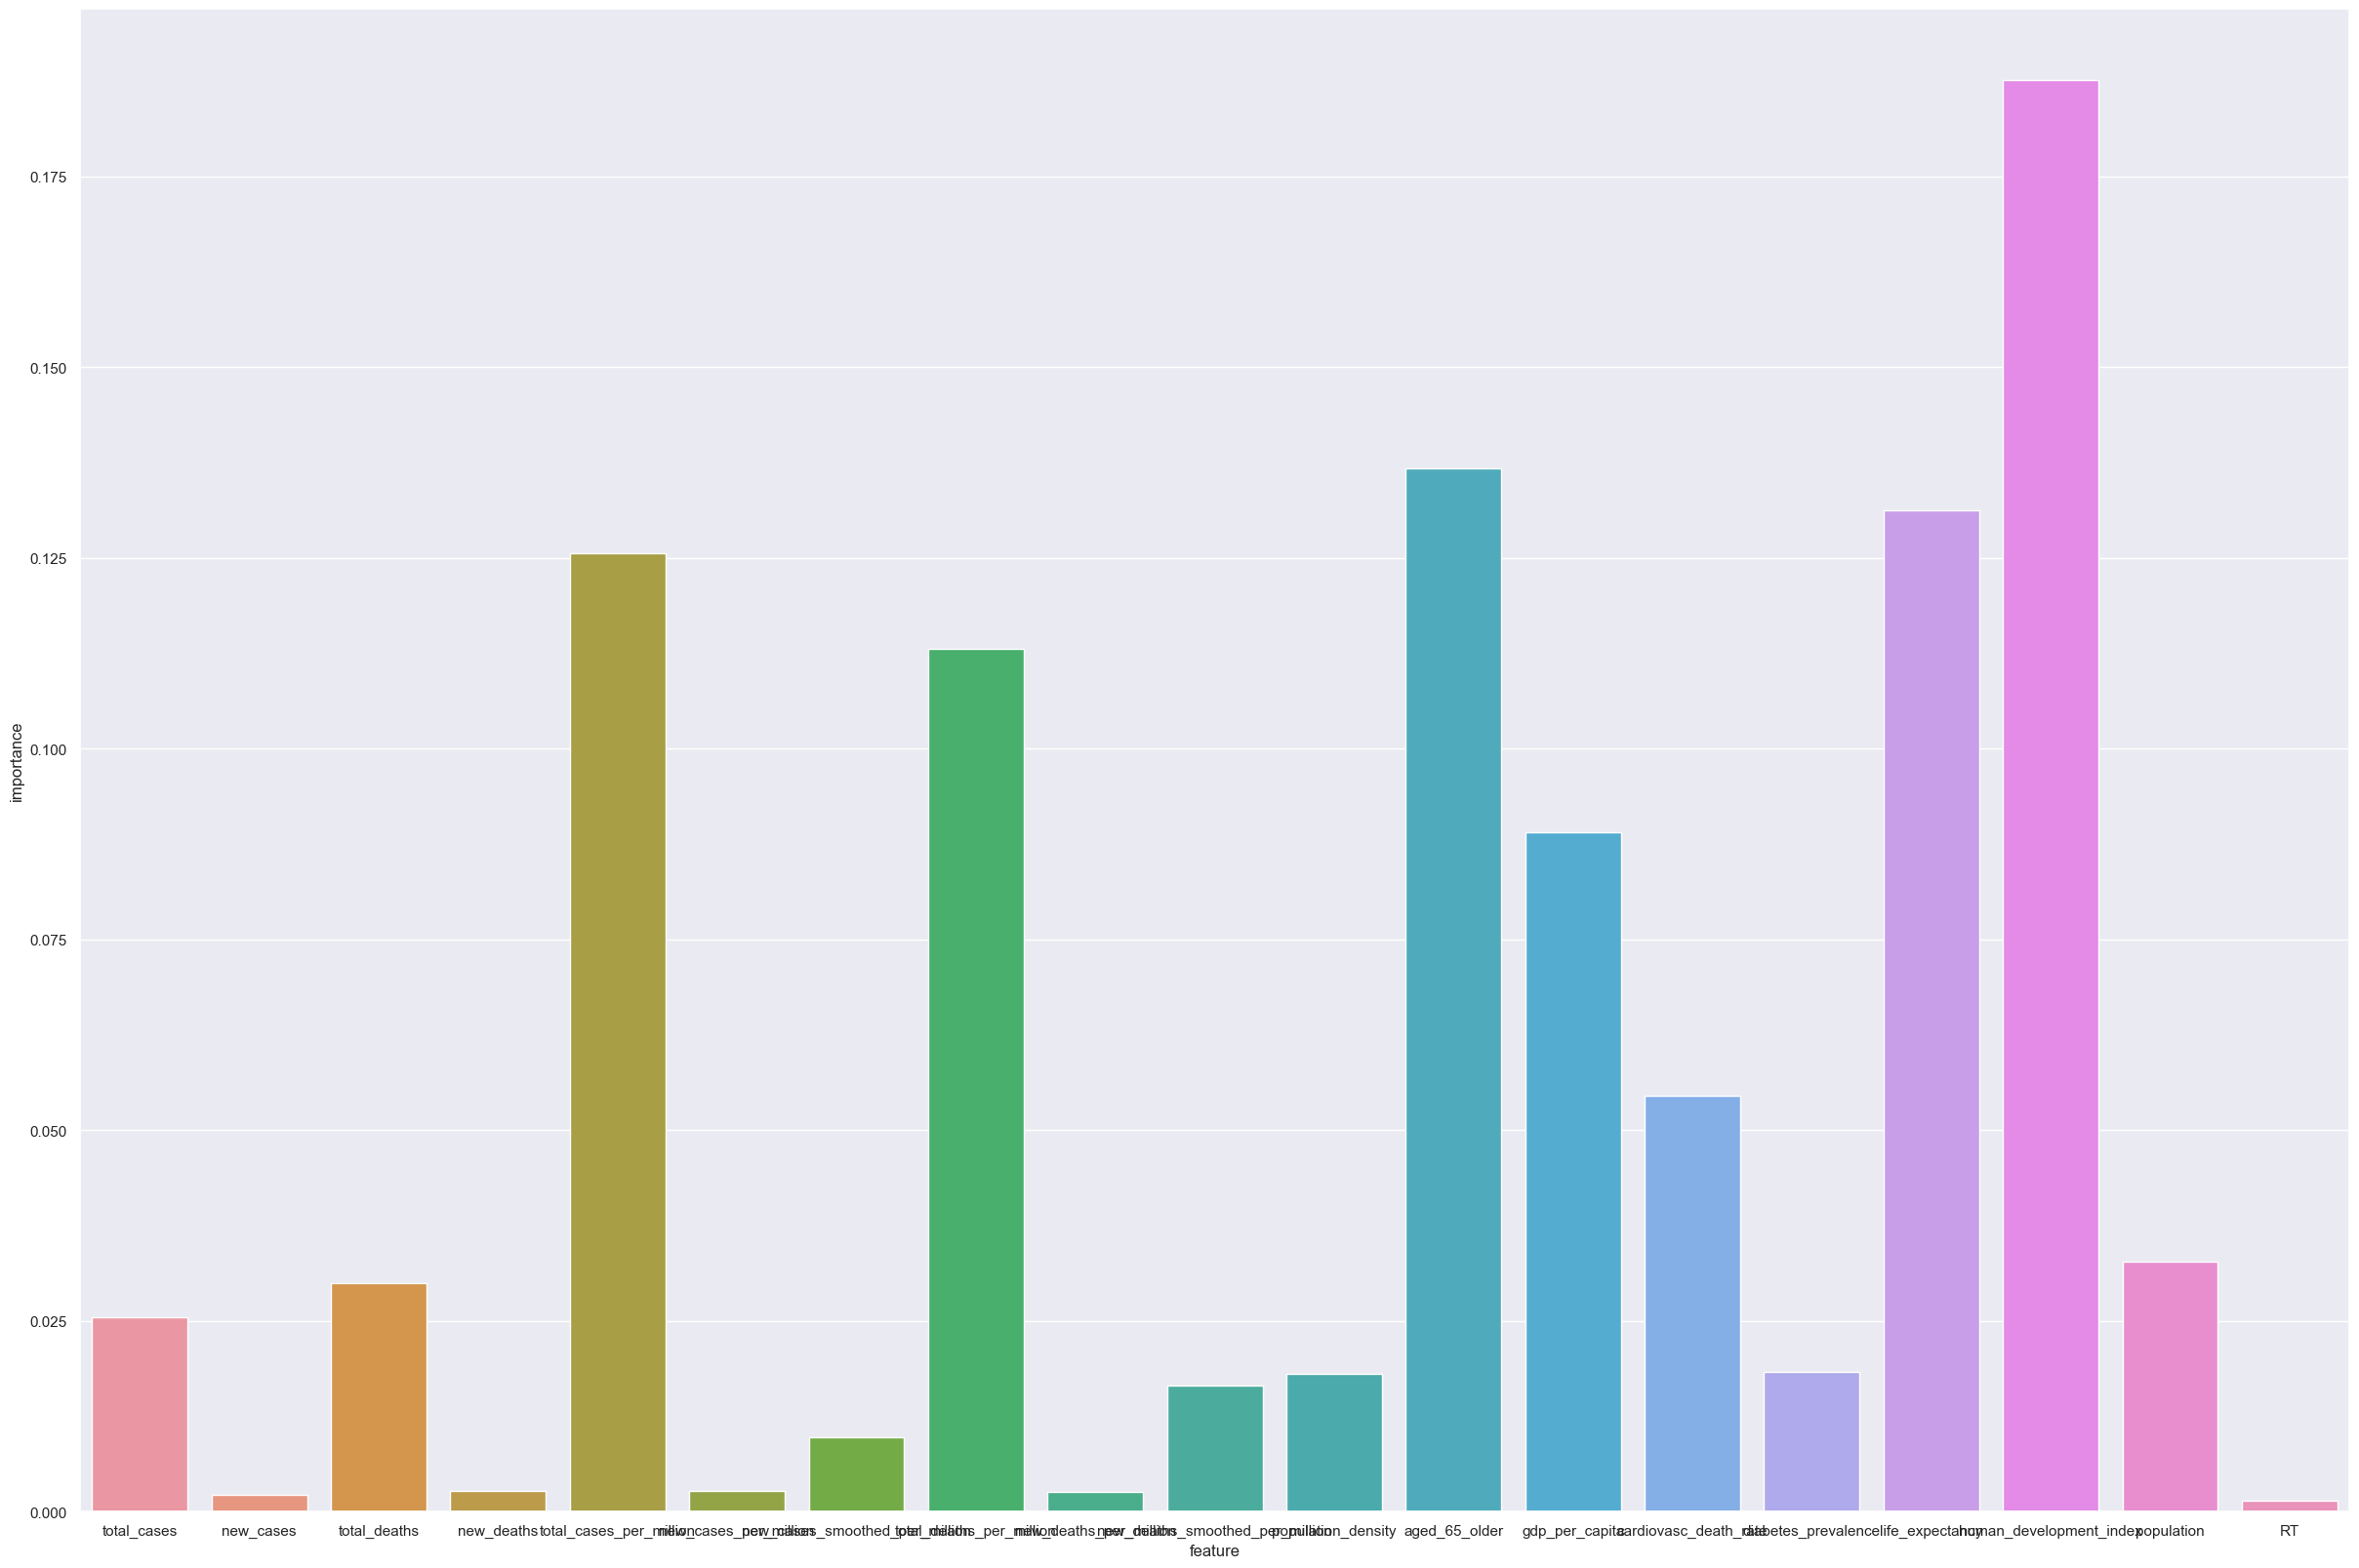

In [15]:
sns.set(rc={'figure.figsize':(30,20)})
sns.barplot(data=df_features_importances, x="feature", y="importance")

здесь чем ниже число importance, тем меньше оно влияет оно на целевую переменную.

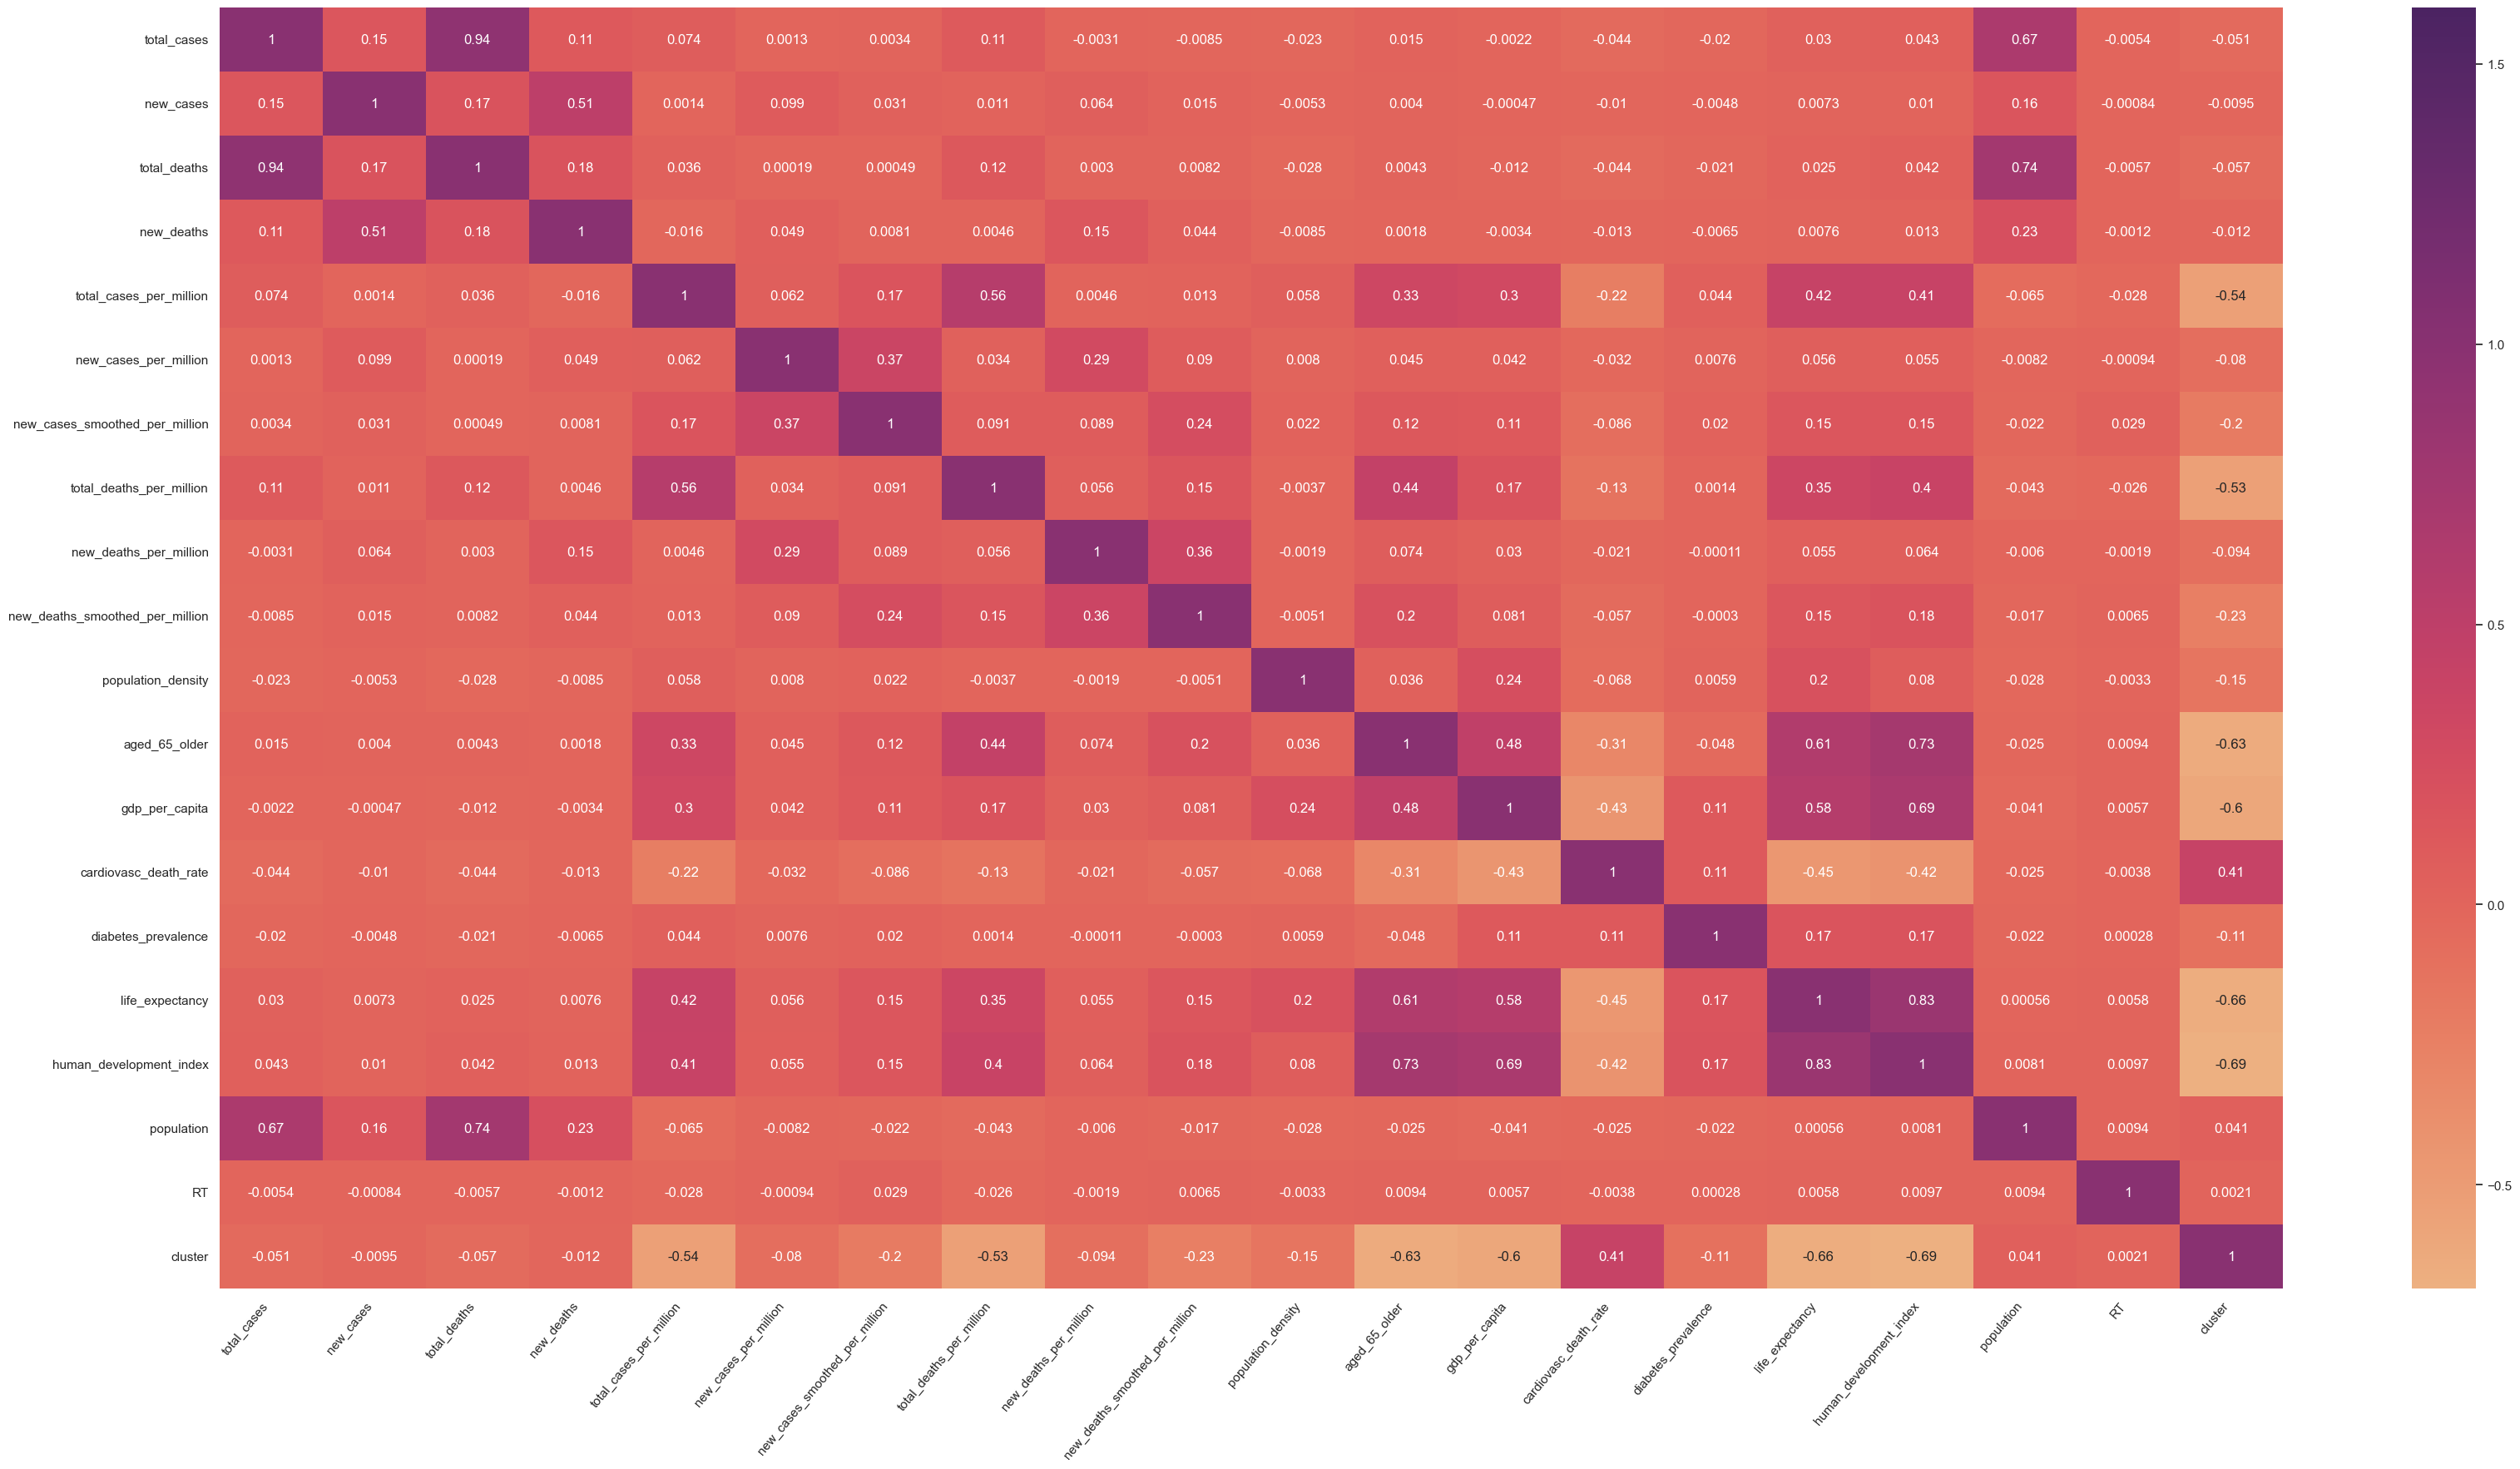

In [17]:
# схема зависимостей между столбцами
plt.figure(figsize = (40, 20))
sns.heatmap(data.corr(),cmap = sns.color_palette("flare", as_cmap=True),annot = True,vmax = 1.6);
plt.xticks(rotation=50, ha='right');

pd.plotting.scatter_matrix() используется для построения матрицы scatterplot для всех числовых признаков в наборе данных. каждая ячейка на диагонали будет представлять собой гистограмму распределения соответствующего признака, а ячейки вне диагонали будут содержать scatterplot, показывающий взаимосвязи между соответствующими парами признаков.

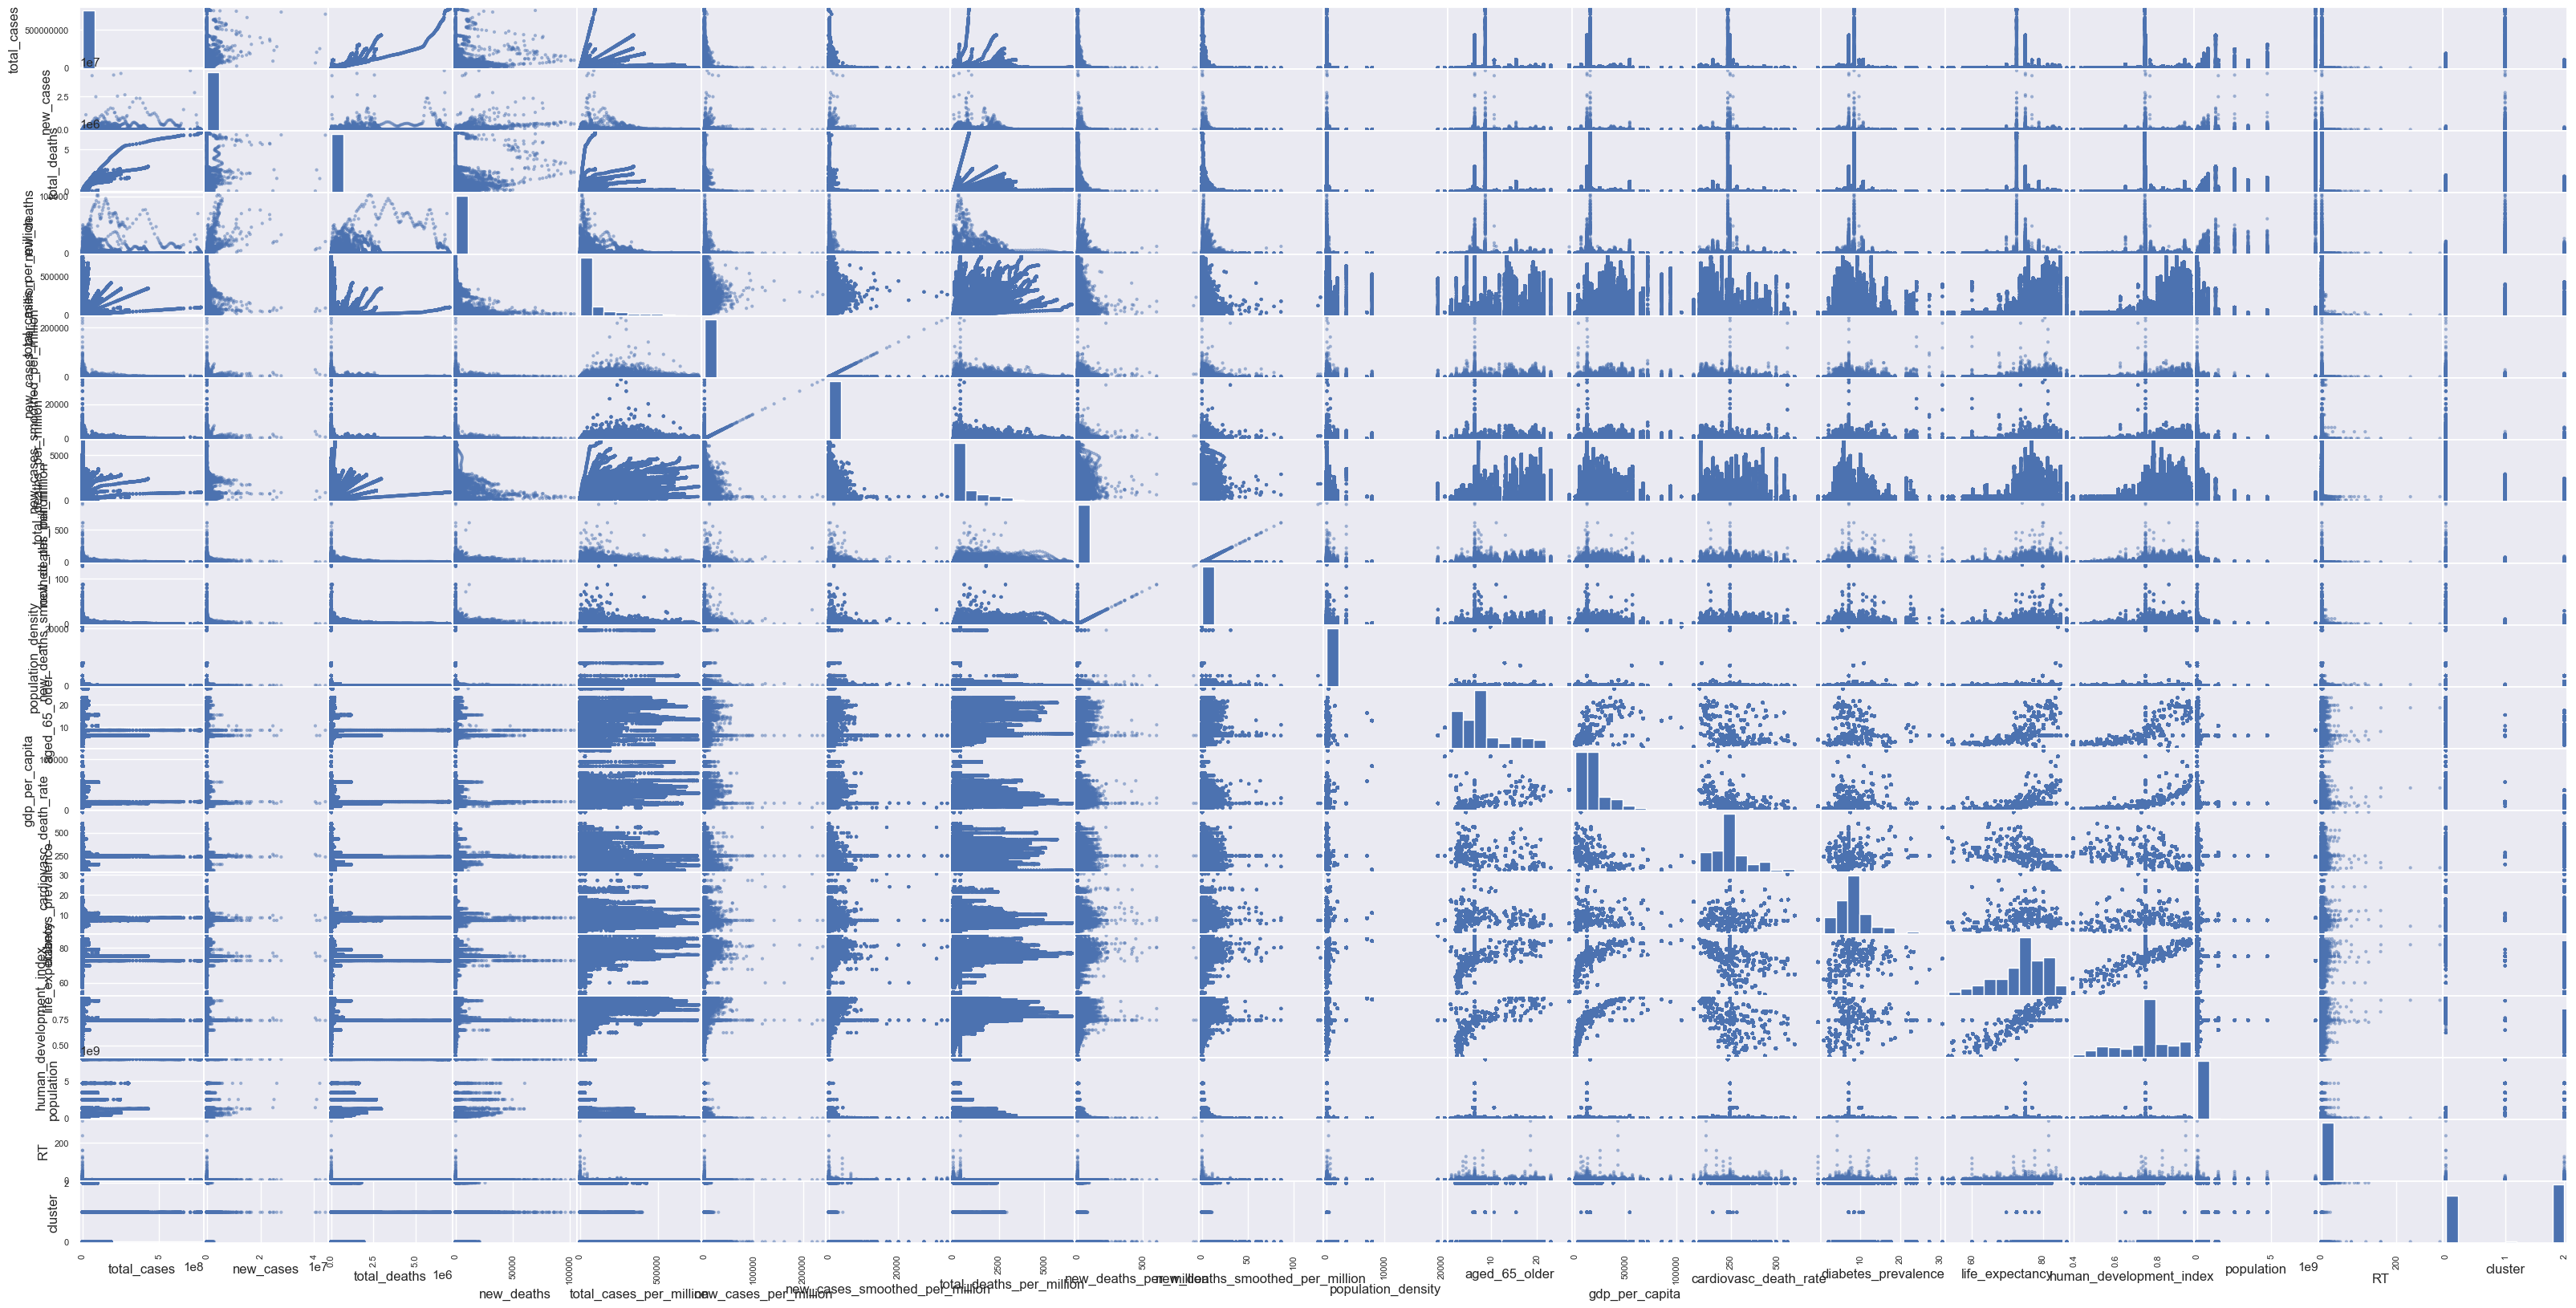

In [18]:
pd.plotting.scatter_matrix(data, figsize=(40,20));

sns.pairplot() используется для создания сетки графиков, которая показывает попарные отношения между различными признаками в наборе данных. помогает визуализировать взаимосвязи между всеми числовыми признаками, а также распределения каждого признака на диагонали.

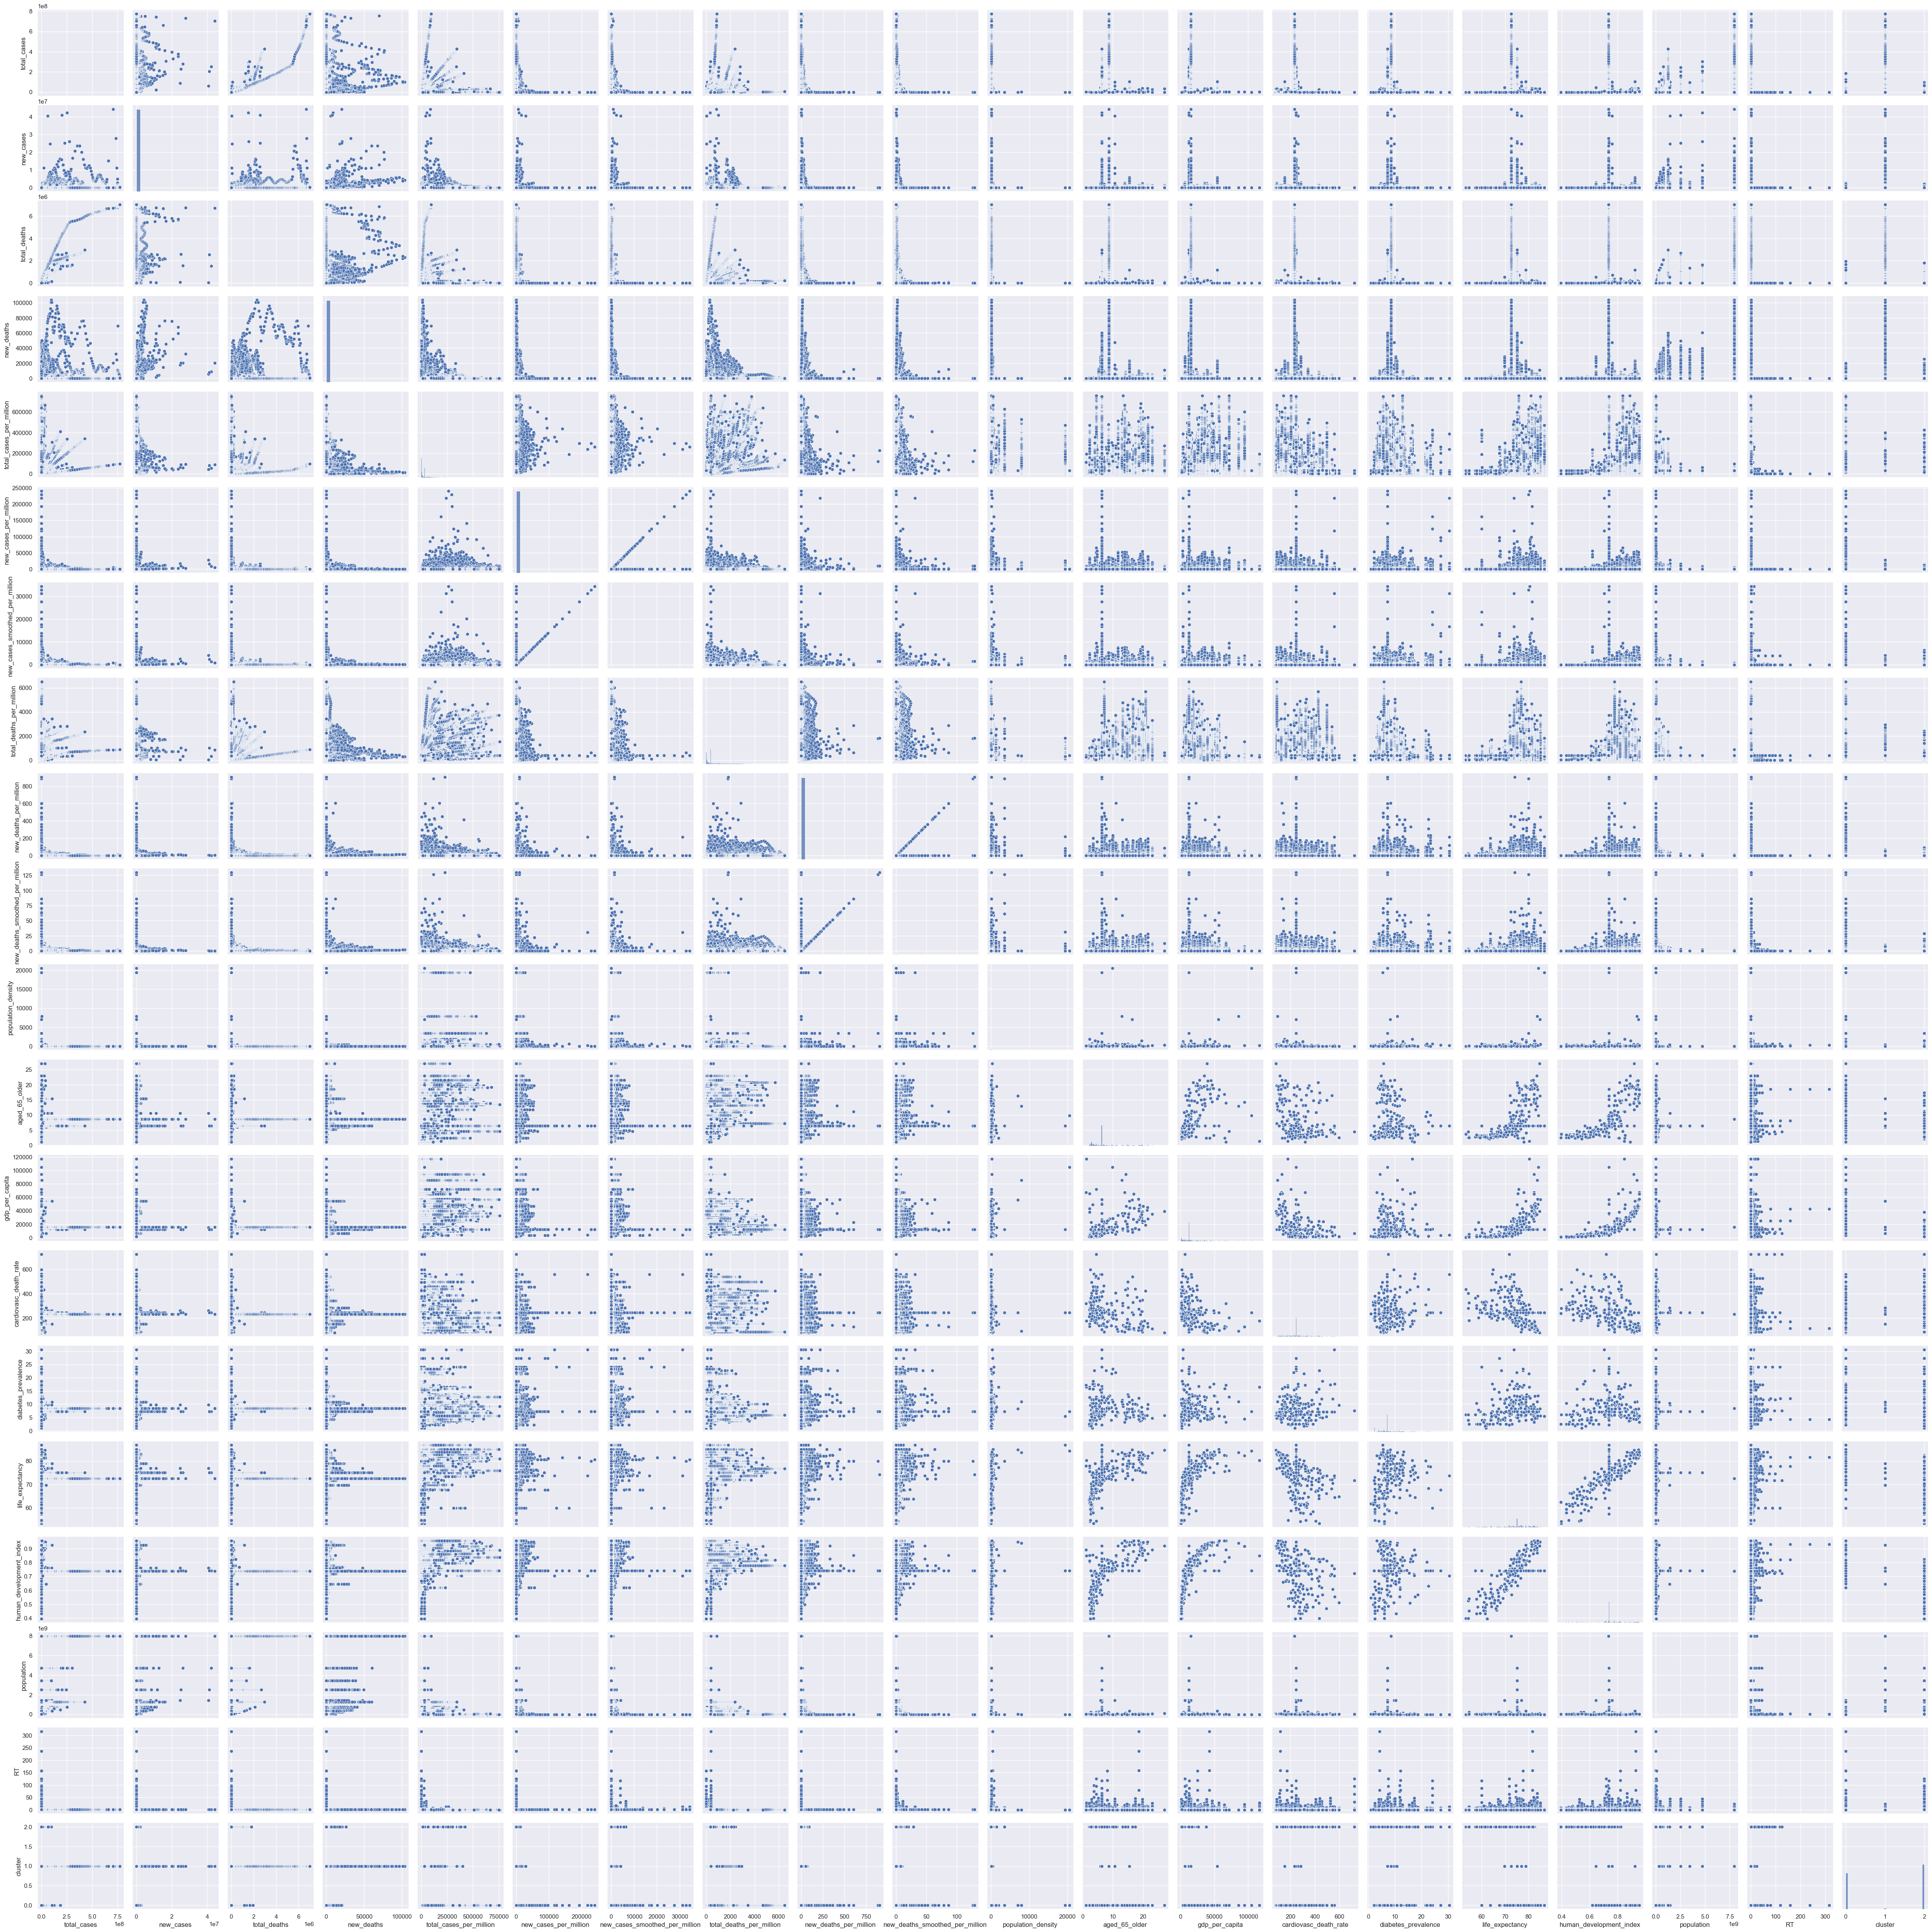

In [19]:
sns.pairplot(data)

In [20]:
data.columns

Index(['total_cases', 'new_cases', 'total_deaths', 'new_deaths',
       'total_cases_per_million', 'new_cases_per_million',
       'new_cases_smoothed_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_deaths_smoothed_per_million',
       'population_density', 'aged_65_older', 'gdp_per_capita',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'life_expectancy',
       'human_development_index', 'population', 'RT', 'cluster'],
      dtype='object')

## 2.3 Классификация исходных компетенций

Выберите модель классификации данных по уровням опасности посещения для туристов. 
Приведите обоснование выбора модели. 

## 2.4 Обучение

Проведите обучение выбранной модели на обучающей выборке. Протестируйте работу 
обученной модели на тестовой выборке. Определите показатели точности работы выбранной 
модели, сравните с остальными рассматриваемыми моделями.

### Метрики

Матрица ошибок (Confusion Matrix) - это инструмент в задачах классификации, который позволяет визуализировать производительность алгоритма путем сравнения фактических меток классов с предсказанными метками классов. Имеет следующий формат:
    True Positive (TP): Количество объектов, которые были правильно классифицированы как класс X.
    False Positive (FP): Количество объектов, которые были неправильно классифицированы как класс X.
    False Negative (FN): Количество объектов, которые были неправильно классифицированы как не класс X.
    True Negative (TN): Количество объектов, которые были правильно классифицированы как не класс X.

Функция accuracy_score из библиотеки scikit-learn используется для вычисления точности модели классификации.

Точность - это простая метрика, которая показывает долю правильно классифицированных примеров относительно общего количества примеров.

Формула для вычисления точности:
Accuracy=Количество правильно классифицированных примеров / Общее количество примеров

Эта метрика полезна для оценки общей производительности модели классификации.

### KNN

Принцип работы K-Nearest Neighbors (k-ближайших соседей, KNN)  заключается в том, что для каждого нового объекта (точки данных) вычисляется его расстояние до всех остальных объектов в обучающем наборе. Затем выбирается k ближайших соседей этой точки. В случае классификации, прогноз для новой точки вычисляется путем применения механизма голосования: объект относится к классу, который наиболее часто встречается среди его k ближайших соседей. В случае регрессии, прогнозное значение вычисляется как среднее (или медианное) значение целевой переменной для k ближайших соседей.

In [36]:
knn = KNeighborsClassifier()
# обучение модели
knn.fit(features_train, target_train)

# используем обученную модель knn для 
# предсказания классов на тестовом наборе данных
knn_predict = knn.predict(features_test)

print("Точность:", accuracy_score(knn_predict, target_test))
print("Матрица ошибок:", confusion_matrix(knn_predict, target_test))

Точность: 0.9961437523432061
Матрица ошибок: [[40967    58     9]
 [    0  1457     0]
 [  222    71 50571]]


### Random forest classifier

Основные принципы работы случайного леса:

Бутстрэп выборка (Bootstrap Sampling): Создается множество случайных подвыборок с повторениями из обучающего набора данных.

Построение деревьев решений (Decision Trees): На каждой подвыборке строится отдельное дерево решений. При этом каждое дерево строится независимо друг от друга, используя только часть признаков (случайный подмножество признаков).

Голосование (Voting): Предсказания всех деревьев объединяются для получения итогового предсказания. В случае классификации выбирается класс, который получает наибольшее количество голосов, а в случае регрессии используется усредненное значение предсказаний.

In [37]:
rfc = RandomForestClassifier()
# обучение модели
rfc.fit(features_train, target_train)

# используем обученную модель knn для 
# предсказания классов на тестовом наборе данных
rfc_predict = rfc.predict(features_test)

print("Точность:", accuracy_score(rfc_predict, target_test))
print("Матрица ошибок:", confusion_matrix(rfc_predict, target_test))

Точность: 0.9993787156552943
Матрица ошибок: [[41147     5    11]
 [    1  1581     0]
 [   41     0 50569]]


### Decision Tree Classifier

Принцип работы классификатора на основе дерева решений:

Построение дерева решений: Начиная с корня дерева, выбирается признак, который лучше всего разделяет данные. Затем данные разделяются на два подмножества в соответствии с выбранным признаком. Этот процесс повторяется рекурсивно для каждого подмножества до тех пор, пока все данные не будут классифицированы или пока не будет достигнут критерий остановки.

Принятие решений: Каждый лист дерева соответствует классу, к которому относятся объекты в соответствующем регионе. При классификации нового объекта происходит его проход через дерево до тех пор, пока не будет достигнут лист, который определяет его класс.

In [38]:
dtc = DecisionTreeClassifier()
# обучение модели
dtc.fit(features_train, target_train)

# используем обученную модель knn для 
# предсказания классов на тестовом наборе данных
dtc_predict = dtc.predict(features_test)

print("Точность:", accuracy_score(dtc_predict, target_test))
print("Матрица ошибок:", confusion_matrix(dtc_predict, target_test))

Точность: 0.9990252262867548
Матрица ошибок: [[41138    12    25]
 [    5  1572     1]
 [   46     2 50554]]


<Axes: title={'center': 'Classifier Accuracy'}, xlabel='Accuracy', ylabel='Classifier'>

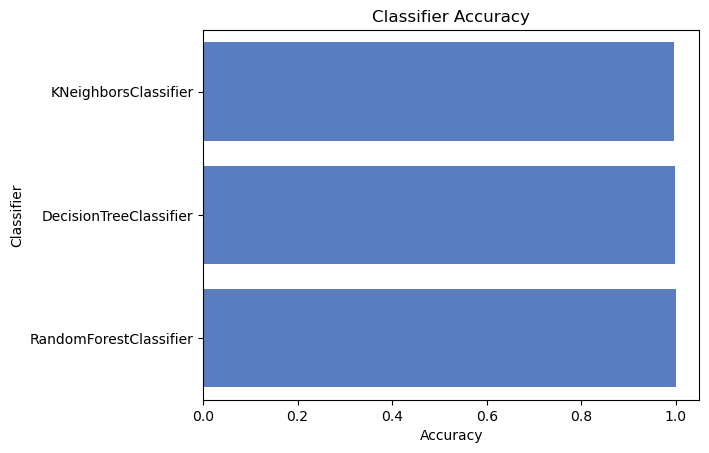

In [39]:
# определение классификаторов
classifiers = [
    KNeighborsClassifier(5),
    RandomForestClassifier(),
    DecisionTreeClassifier()
]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

acc_dict = {}

for clf in classifiers:
	name = clf.__class__.__name__
#     выполняется обучение модели
	clf.fit(features_train, target_train)
#     выполняются предсказания для тестового набора данных
	train_predictions = clf.predict(features_test)
#     вычисляется точность модели
	acc = accuracy_score(target_test, train_predictions)
	if name in acc_dict:
		acc_dict[name] += acc
	else:
		acc_dict[name] = acc

# округление точности
for clf in acc_dict:
#     создание датафрейма
	log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
	log = log.append(log_entry)

#     визуализация результата
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log.sort_values(by='Accuracy'), color="b")

In [40]:
log

Classifier  Accuracy
0    KNeighborsClassifier  0.996144
0  RandomForestClassifier  0.999443
0  DecisionTreeClassifier  0.998982

на основании результатов оценки моделей с использованием метрики accuracy_score, можно сделать вывод, что RandomForestClassifier демонстрирует наилучшую производительность среди рассмотренных классификаторов. это означает, что модель случайного леса лучше всего справляется с предсказанием классов для новых данных в сравнении с другими моделями, такими как KNeighborsClassifier и RandomForestClassifier.

## 2.5 Feature Engineering

Путём преобразования набора данных, добейтесь более точной работы выбранной модели. 
Опишите приемы генерации новых данных и результаты, к которым они привели, рассматривая
все ранее определенные показатели точности

In [17]:
print(type(df_features_importances))

<class 'pandas.core.frame.DataFrame'>


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373418 entries, 0 to 373417
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   total_cases                      373418 non-null  float64
 1   new_cases                        373418 non-null  float64
 2   total_deaths                     373418 non-null  float64
 3   new_deaths                       373418 non-null  float64
 4   total_cases_per_million          373418 non-null  float64
 5   new_cases_per_million            373418 non-null  float64
 6   new_cases_smoothed_per_million   373418 non-null  float64
 7   total_deaths_per_million         373418 non-null  float64
 8   new_deaths_per_million           373418 non-null  float64
 9   new_deaths_smoothed_per_million  373418 non-null  float64
 10  population_density               373418 non-null  float64
 11  aged_65_older                    373418 non-null  float64
 12  gd

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [42]:
# create a RandomForestClassifier object
clf = RandomForestClassifier()

# define the hyperparameters to search over
param_grid = {'n_estimators': [10, 50, 100],
              'max_depth': [None, 10, 20],
              'min_samples_split': [2, 5, 10]}

# create a GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1, refit=True)

# fit the GridSearchCV object to the training data
grid_search.fit(features_train_scaled, target_train)

# print the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)

# use the best hyperparameters to train a new model on the entire dataset
best_clf = grid_search.best_estimator_
best_clf.fit(features_train_scaled, target_train)

# evaluate the performance of the model on the testing data
accuracy = best_clf.score(features_test_scaled, target_test)
print('Test accuracy:', accuracy)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best hyperparameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}
Test accuracy: 0.9993037330619677


После улучшения модели через GridSearchSV мы получили модель с точностью 0.9993037330619677, т.е. её точность составляет 99.99%. Такая большая точность это не очень хорошо, но что получили то и получили, т.к. все три метрики показали примерно 99+%.

## 2.6 Подготовка отчёта

### 2.1 Разбиение набора данных

1. Разбиваем данные на две части: 1-ая часть это целевая переменная (у нас это атрибут кластер), 2-ая часть это все остальные атрибуты, в которые не входит целевая переменная.
2. Делаем для тестовой выборки 0.25 от исходных данных, т.к. тестовая часть требует меньше данных.
3. Получили размерность четырёх выборок: (280063, 19) (93355, 19) (280063,) (93355,)

В результате мы разделили исходный набор данных на две части и сделали четыре выборки с разными размерами, в будущем нам они пригодятся для обучения модели.

### 2.2 Визуализация зависимостей данных

1. Делаем графическое представление атрибута кластер (смотрим кол-во 1-ых, 2-ых и 3-их кластеров)
2. Выделяем важные атрибуты для обучения модели и строим по ним графики, которые показывают важность каждого атрибута (barplot, heatmap, scatter_matrix, pairplot)
3. Строим графики гистограмм для каждого признака и сравниваем разницу между распределениями до и после устранения пропусков
4. Преобразуем категориальные признаки в числовые
5. Делаем отбор значимых признаков

В результате мы выделили важные атрибуты для обучения нашей модели, и получили такой датасет с атрибутами: 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'population_density', 'aged_65_older', 'gdp_per_capita', 'cardiovasc_death_rate', 'diabetes_prevalence', 'life_expectancy', 'human_development_index', 'population', 'RT', 'cluster'.

### 2.3 Классификация исходных компетенций

1. Сразу переходим к пункту 2.4

В результате мы пропустили этот пункт, т.к. основная его часть будет содержаться в 2.4

### 2.4 Обучение

1. Обучаем модель через K-Nearest Neighbors
2. Обучаем модель через RandomForestClassifier 
3. Обучаем модель через DecisionTreeClassifier
4. Строим каждый график который будет показывать точность каждого классификатора, и найдём классификатор с самой большой точностью

В результате на основании результатов оценки моделей с использованием метрики accuracy_score, можно сделать вывод, что RandomForestClassifier демонстрирует наилучшую производительность среди рассмотренных классификаторов. это означает, что модель случайного леса лучше всего справляется с предсказанием классов для новых данных в сравнении с другими моделями, такими как KNeighborsClassifier и RandomForestClassifier.В результате 

### 2.5 Feature Engineering

1. Для лучшей модели из 2.4 мы делаем переобучение через GridSearchSV

В результате после улучшения модели через GridSearchSV мы получили модель с точностью 0.9993037330619677, т.е. её точность составляет 99.99%. Такая большая точность это не очень хорошо, но что получили то и получили, т.к. все три метрики показали примерно 99+%.

### 2.6 Подготовка отчёта

Подготовим результирующий файл Data.zip который будет содержать данные полученного датасета в формате csv и файл этого notebook'a в формате ipynb и html.

In [ ]:
import zipfile # для архивации
import nbformat
from nbconvert import HTMLExporter

# Записать DataFrame в CSV файл
csv_file = 'data2.csv' # Имя файла, который мы хотим создать
data.to_csv(csv_file, index=False)

# Создание переменной с файлом notebook'a
ipynb_file = 'Damir_Session2.ipynb'

# Конвертирование .ipynb в .html
html_exporter = HTMLExporter()
html_exporter.template_name = 'classic'

# Загрузить содержимое .ipynb файла
with open(ipynb_file, 'r', encoding='utf-8') as f:
    notebook_content = nbformat.reads(f.read(), as_version=4)
    
# Конвертирование в HTML
(body, resources) = html_exporter.from_notebook_node(notebook_content)

# Запись HTML в файл
html_file = ipynb_file.replace('.ipynb', '.html')
with open(html_file, 'w', encoding='utf-8') as f:
    f.write(body)
    
# Создание строки со содержанием для README.md
readme_content = """
## Содержимое архива

**data2.csv** - результирующий набор данных, полученный в конце первой сессии.
**Damir_Session2.ipynb** - файл в формате ipynb, содержащий визуальную часть и логическую (код) часть, в котором присутствует полный ход работы на первой сессии.
**Damir_Session2.html** - файл в формате html, содержащий визуальную часть и логическую (код) часть, в котором присутствует полный ход работы на первой сессии.
**README.md** - файл, в котором содержится описание всех файлов в zip-архиве Data.zip.
"""

# Создание файла README.md и запись в него содержимого
readme_file = 'README.md'
with open(readme_file, 'w', encoding='utf-8') as f:
    f.write(readme_content.strip())

# Архивировать CSV файл в ZIP-архив
zip_file = 'Data.zip' # Имя создаваемого архива

# Создание архива и добавление файлов
with zipfile.ZipFile(zip_file, 'w') as zip:
    zip.write(csv_file, arcname=csv_file)
    zip.write(ipynb_file, arcname=ipynb_file)
    zip.write(html_file, arcname=html_file)
    zip.write(readme_file, arcname=readme_file)

# После этого 'Data.zip' будет содержать 'data2.csv', 'Damir_Session2.ipynb', 'Damir_Session2.html' и 'README.md'